# Fandango Data Analysis Project
## Overview

Fandango is an American ticketing company that sells movie tickets. It also provides its own rating of movies.

An article was published in 2015 by "FiveThirtyEight" that the five-star rating system used by Fandango was biased, in which almost no movie gets fewer than three stars, according to a FiveThirtyEight analysis. 

### Goal:

**To determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**


## Background and Data


**Article by FiveThirtyEight: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.


#### Dataset One: All Sites Score

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb


#### Dataset Two: Fandango Movie Ratings

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Stars versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**DataFrame Properties**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Exploring the relationship between popularity of a film and its rating. Scatterplot showing the relationship between rating and votes.**

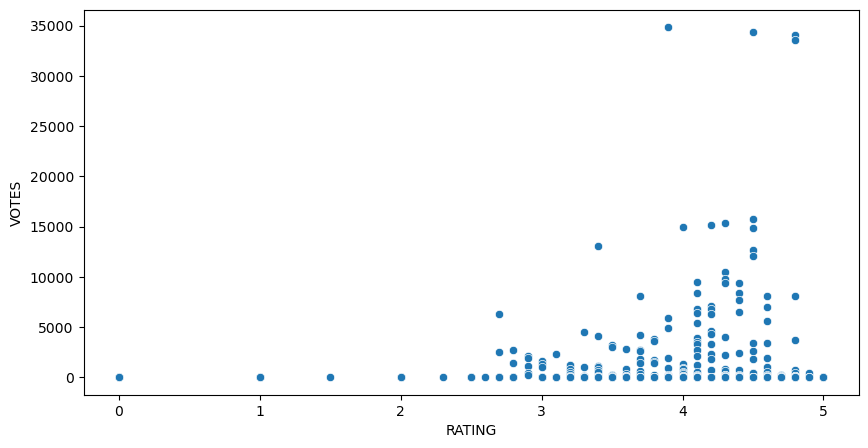

In [6]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')
plt.show()

**Correlation between the columns:**

In [12]:
fandango.drop('FILM', axis = 1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000



    
**Setting new column as YEAR**

In [26]:
fandango['YEAR'] = fandango['FILM'].apply(lambda movie:int(movie.split('(')[-1].strip(')')))

In [27]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Movies in Fandango DataFrame per year**

In [28]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

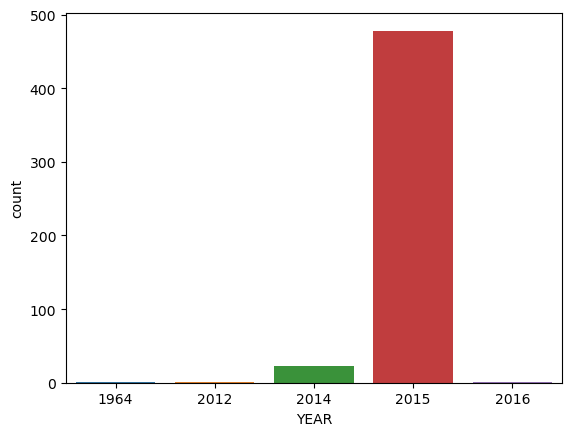

In [29]:
sns.countplot(data = fandango, x = 'YEAR')

**10 movies with the highest number of votes**

In [33]:
fandango.sort_values('VOTES', ascending = False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Generating DataFrame of only reviewed films by removing any films that have zero votes.**

In [35]:
fandango = fandango[fandango['VOTES'] != 0]

----

**Distribution of STARS Displayed and TRUE Rating**

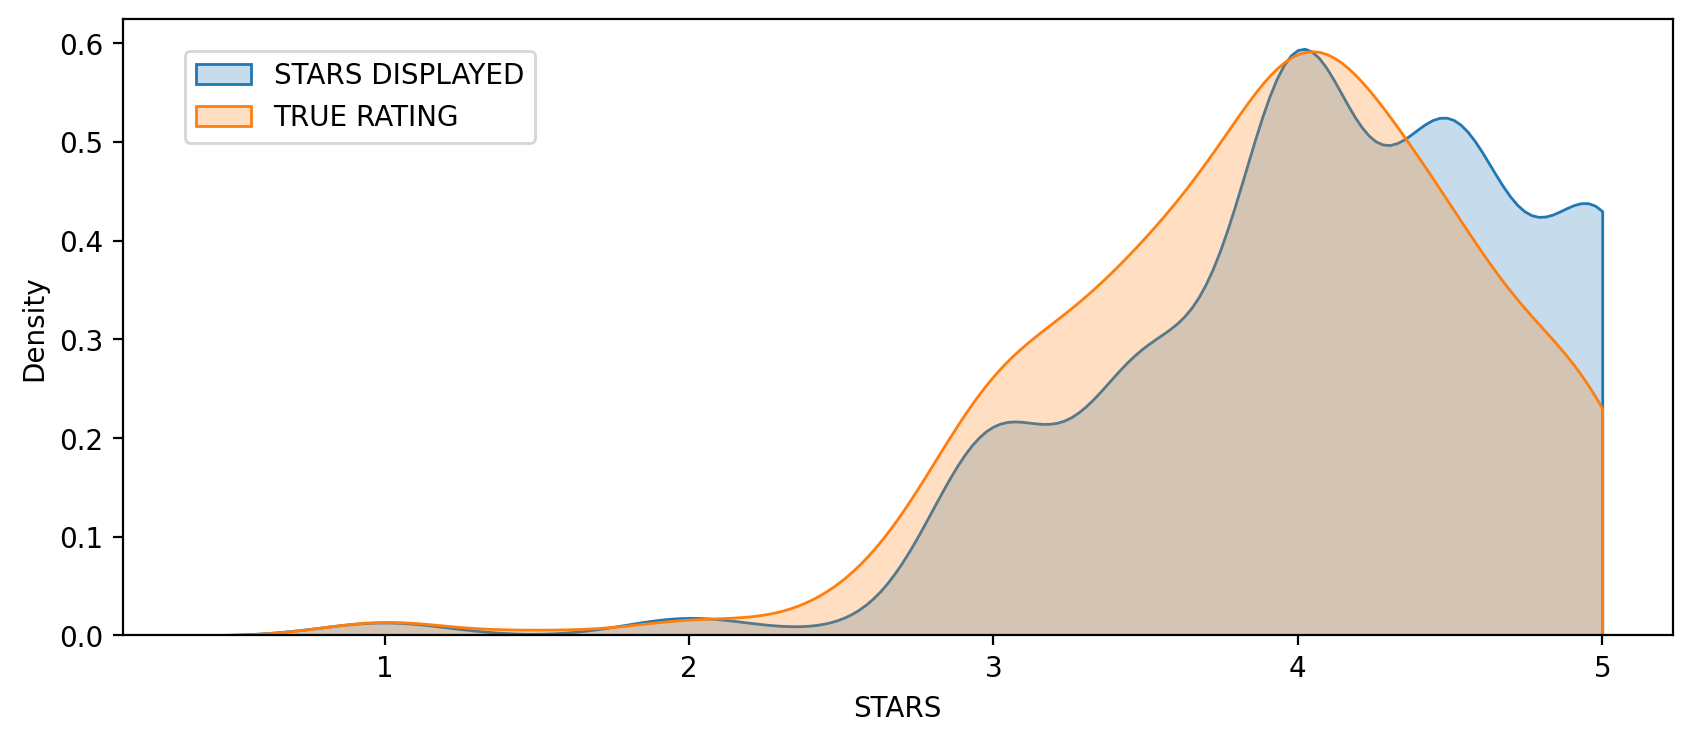

In [46]:
plt.figure(figsize = (10,4), dpi = 200)
sns.kdeplot(data = fandango, x = 'STARS', fill = True, clip = (0,5), label = 'STARS DISPLAYED')
sns.kdeplot(data = fandango, x = 'RATING', fill = True, clip = (0,5), label = 'TRUE RATING')
plt.legend(loc = (0.04,0.8))
plt.show()
# It shows more movies were displaying Stars rating higher than actual rating

**Quantifying the discrepancy between STARS displayed versus true RATING.**

In [47]:
fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'],1)

In [48]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Displaying the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

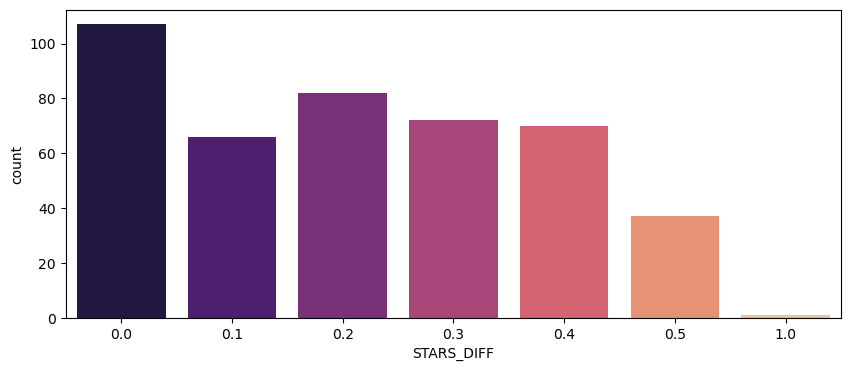

In [49]:
plt.figure(figsize =(10,4))
sns.countplot(data = fandango, x = 'STARS_DIFF', palette = 'magma')

**We observe from the plot that one movie was displaying over a 1 star difference than its true rating!**

In [50]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

Comparing the scores from Fandango to other movies sites.


In [51]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [52]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [53]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [54]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

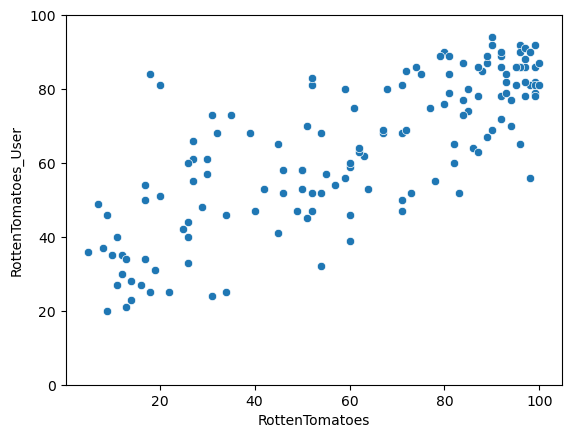

In [56]:
sns.scatterplot(data=all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.ylim(0,100)
plt.show()



**Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.**

In [57]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [58]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Mean Absolute Difference between RT scores and RT User Scores**

In [59]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

**Plotting the distribution of the differences between RT Critics Score and RT User Score.**

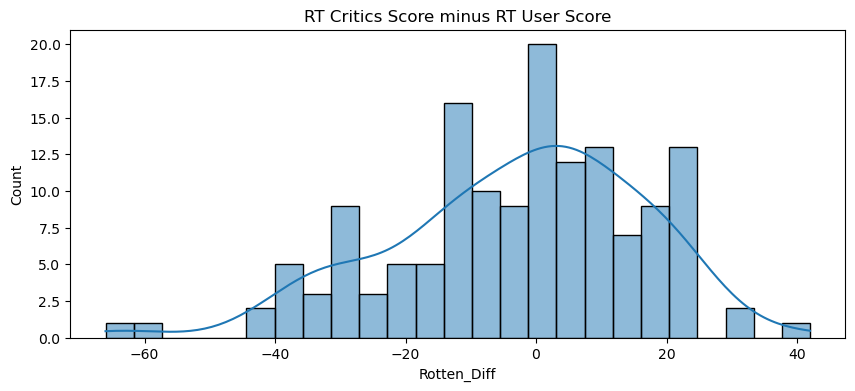

In [67]:
plt.figure(figsize = (10,4))
sns.histplot(data = all_sites, x = 'Rotten_Diff', kde = True, bins = 25)
plt.title('RT Critics Score minus RT User Score')
plt.show()

**The top 5 movies users rated higher than critics on average:**

In [79]:
all_sites[all_sites['Rotten_Diff'] < 0][['FILM','Rotten_Diff']].sort_values('Rotten_Diff').head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scores higher than users on average.**

In [80]:
all_sites[all_sites['Rotten_Diff'] > 0][['FILM','Rotten_Diff']].nlargest(5,'Rotten_Diff')

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Metacritic also shows an average user rating versus their official displayed rating.

In [251]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


**Scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

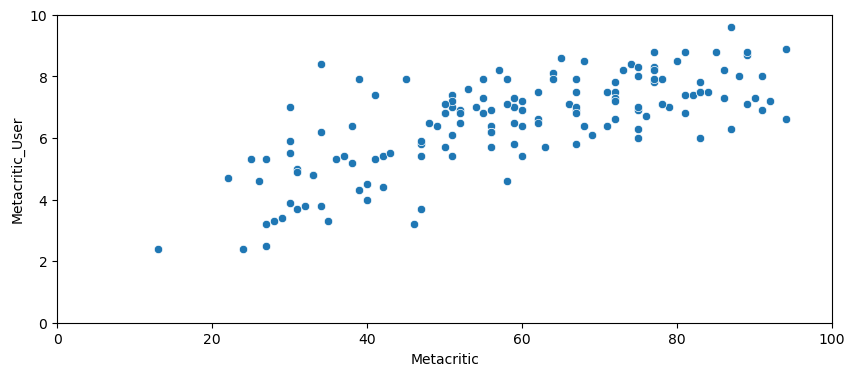

In [81]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Analyzing the most popular movies.

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

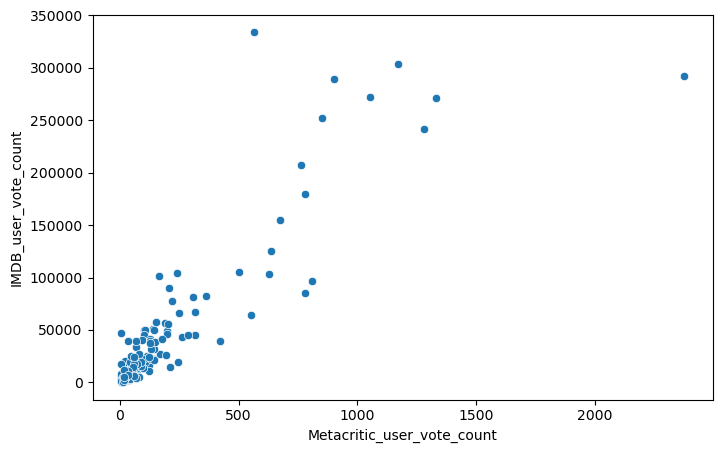

In [87]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

**There are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.**

In [88]:
all_sites.sort_values('IMDB_user_vote_count',ascending =False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie that has the highest Metacritic User Vote count**

In [89]:
all_sites.sort_values('Metacritic_user_vote_count',ascending =False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites



**Combining the Fandango Table with the All Sites table.**

In [161]:
compare = pd.merge(fandango,all_sites,how = 'inner', on = 'FILM')

In [162]:
compare.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [163]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

### Normalize columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.



In [101]:
compare['RT_Norm'] = round(compare['RottenTomatoes']/20,1)

In [102]:
compare['RTU_Norm'] = round(compare['RottenTomatoes_User']/20,1)

In [103]:
compare['Meta_Norm'] = round(compare['Metacritic']/20,1)

In [104]:
compare['Meta_U_Norm'] = round(compare['Metacritic_User']/2,1)

In [105]:
compare['IMDB_Norm'] = round(compare['IMDB']/2,1)

In [106]:
compare.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Generating a norm_scores DataFrame that only contains the normalizes ratings including both STARS and RATING from the original Fandango table.**

In [107]:
norm_scores = compare[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [108]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

Now we will try to observe if Fandango display abnormally high ratings


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

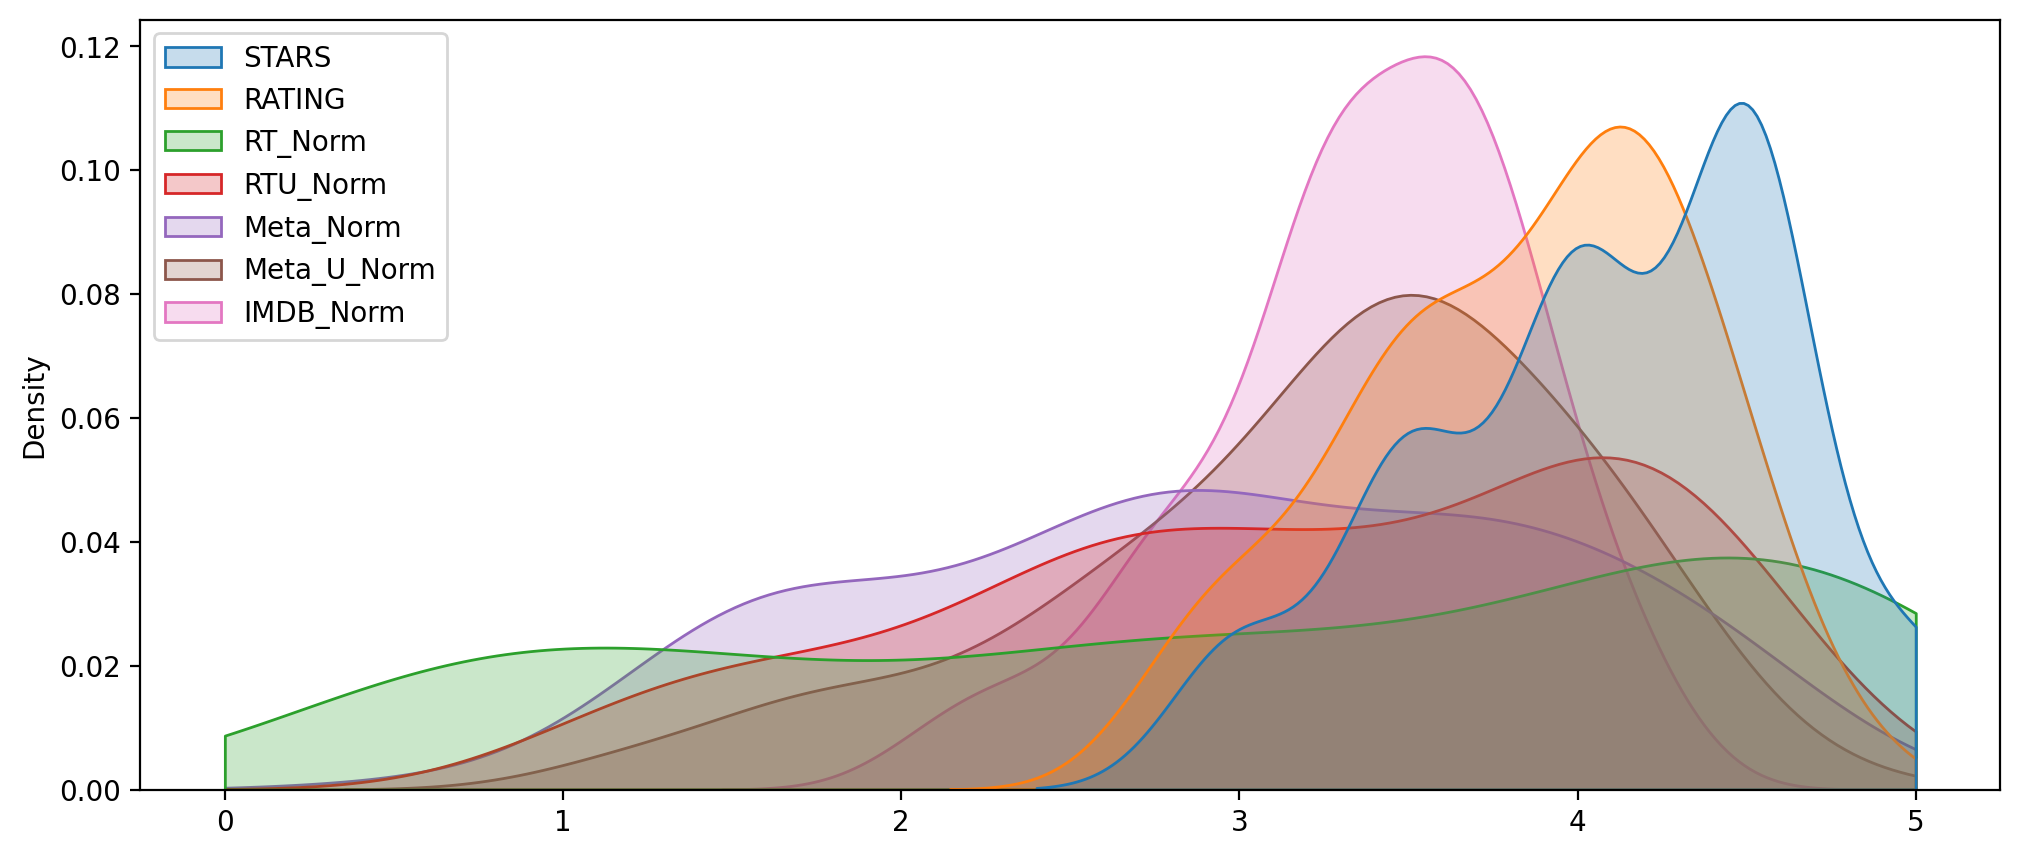

In [122]:
fig,ax = plt.subplots(figsize = (12,5), dpi = 200)
sns.kdeplot(data = norm_scores, fill = True, clip = (0,5))

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
move_legend(ax, "upper left")

**It can be observed that most movies got very high STARS rating from Fandango.** 

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Fandango Stars vs Rotten Tomatoes Critics**

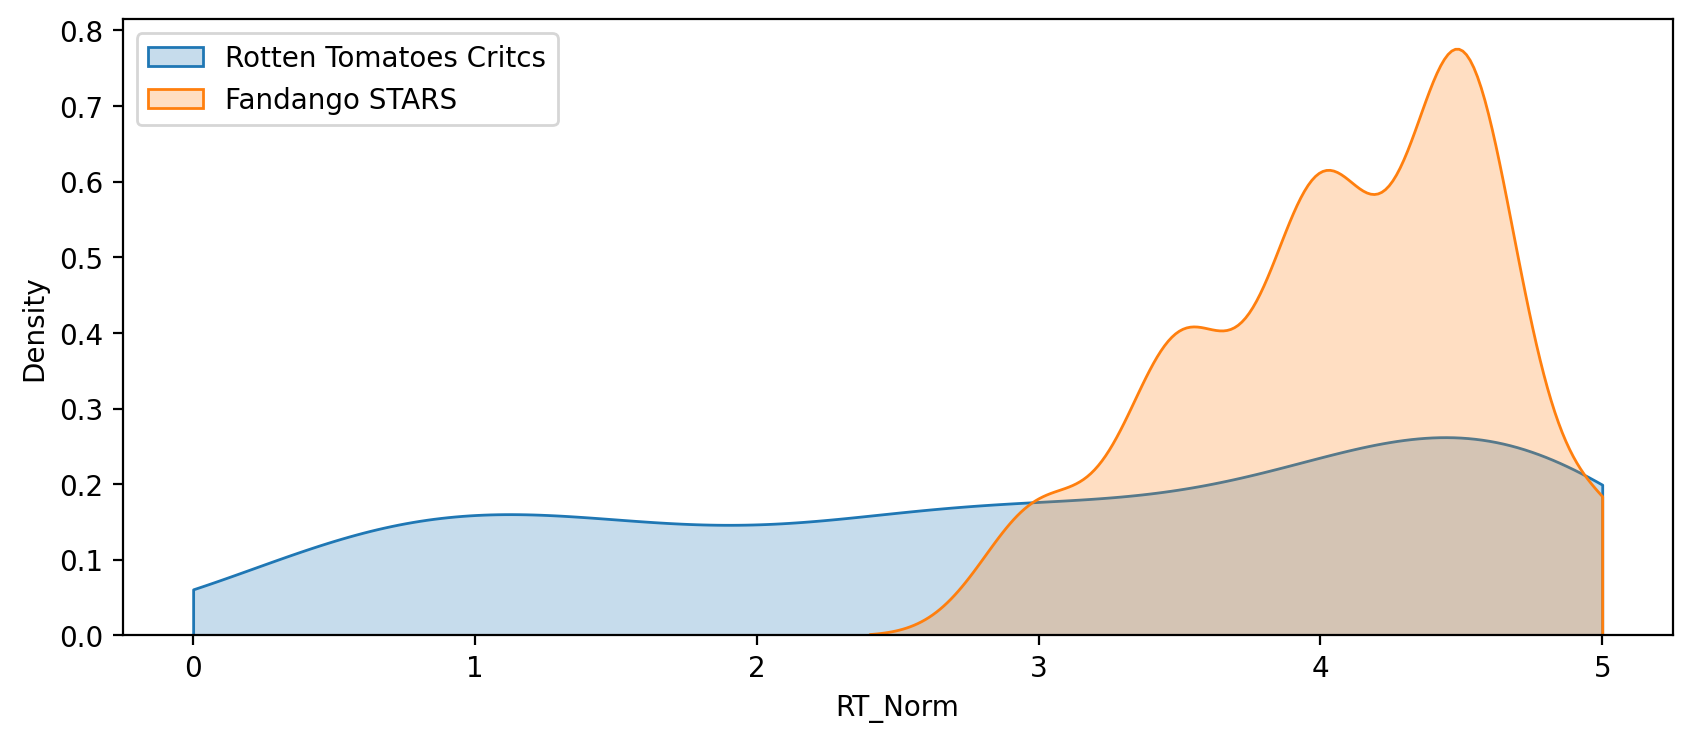

In [128]:
plt.figure(figsize = (10,4), dpi = 200)
sns.kdeplot(data = norm_scores, x = 'RT_Norm', label = 'Rotten Tomatoes Critcs', fill = True, clip = (0,5))
sns.kdeplot(data = norm_scores, x = 'STARS', label = 'Fandango STARS', fill = True, clip = (0,5))
plt.legend(loc = 'upper left')
plt.show()



**Now we create a clusterplot which will cluster similar kind of movies together. That means low rated movies form each rating site would be clustered together.**

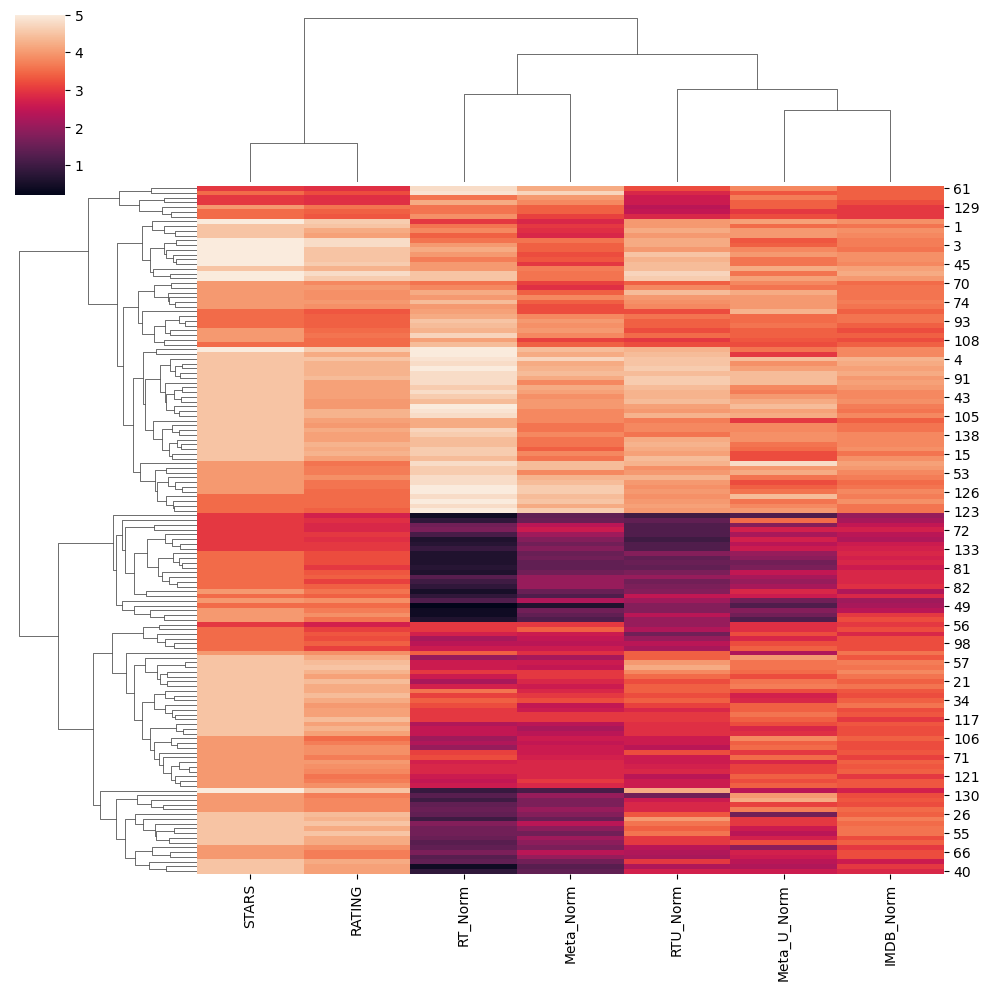

In [130]:
sns.clustermap(data = norm_scores)
plt.show()

# Here also we can observe that, movies which were given a rating of 1 and 2 were very highly rated by Fandango.

### Top 10 Worst Movies according to Rotten Tomatoes Critics

In [147]:
final_rating = pd.concat([compare['FILM'],norm_scores],axis = 1)

In [150]:
final_rating.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [153]:
# Worst movies according to RT Critics
worst_movies = final_rating.iloc[final_rating['RT_Norm'].nsmallest(10).index]

In [154]:
worst_movies.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0


**Distribution of ratings across all sites for the top 10 worst movies.**

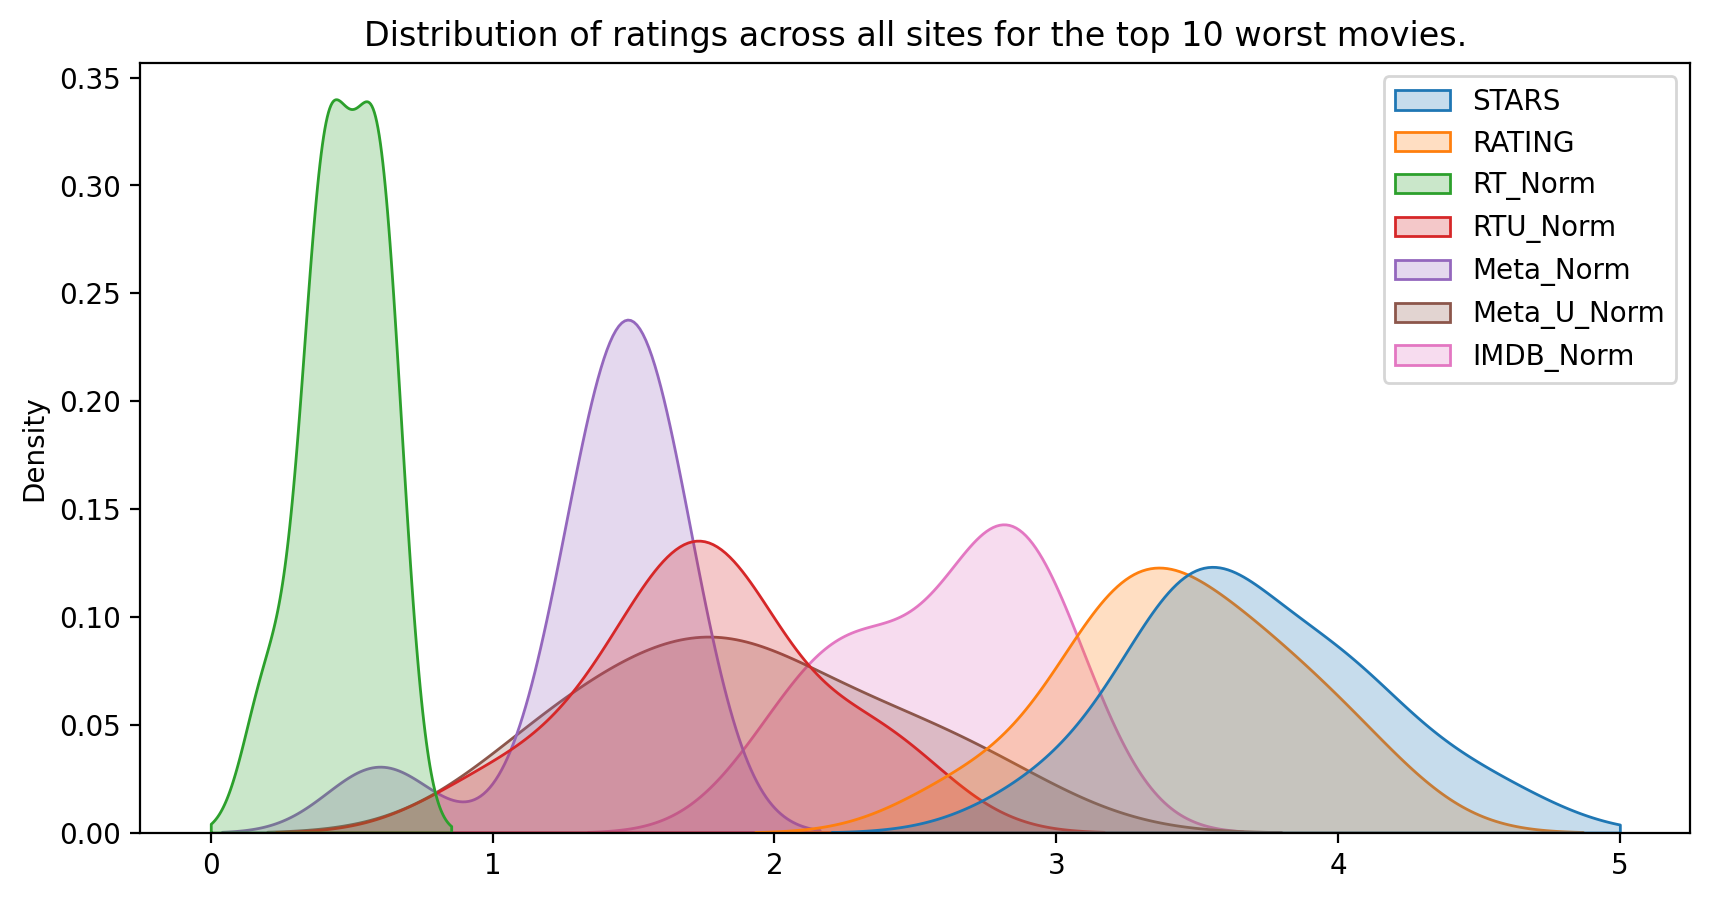

In [160]:
plt.figure(figsize = (10,5), dpi = 200)
sns.kdeplot(data = worst_movies, fill = True, clip = (0,5))
plt.title('Distribution of ratings across all sites for the top 10 worst movies.')
plt.show()

### Finding the biggest fraud

In [164]:
final_rating['Fraud'] = final_rating['STARS'] - final_rating['RT_Norm']

In [167]:
final_rating.sort_values('Fraud',ascending = False).head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,Fraud
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0,4.1
67,Do You Believe? (2015),5.0,4.5,0.9,4.2,1.1,2.4,2.7,4.1
40,Pixels (2015),4.5,4.1,0.8,2.7,1.4,2.6,2.8,3.7
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0,3.6
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4,3.6


### The Fandango rating for "Taken 3" is 4.1 points greater than the RT Critics rating.
**The difference and biasing is huge.**

In [169]:
final_rating.iloc[final_rating['Fraud'].idxmax()]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Fraud                     4.1
Name: 25, dtype: object

#### Average Rating of Taken 3 considering all sites other than Fandango

In [173]:
(0.4+2.3+1.3+2.3+3)/5

1.86



### Final thoughts: Fandango were showing around 3-4 star ratings for films that are clearly bad! The biggest offender. Fandango were displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!